

# Project: Investigate TMdb Movie Data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  I have choosen the TMdb Movie Data set, which have tons of information related to movies as cast,budget and revenue.My goal here is to try to  answer some intresing questions. Q1 which is very generic is What kinds of properties are associated with movies that have high revenues? this is followed by 2 sub questions 1- what is the best season for movies to be released (summer or winter) ? 2- which genere has highest revenes ? More over, Does voting counts increase each year? and finally Is budget affected by runtime ? you would think this is a stright forward answer but you will be amazed

# <a id='wrangling'></a>
## Data Wrangling


#### General Properties

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
% matplotlib inline



In [114]:
# loading the Data
df = pd.read_csv('tmdb-movies.csv') 

In [115]:
# Get the Shape of our Data Set
df.shape

(10866, 21)

In [116]:
# getting a qucik review of my data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [117]:
# check for data types and Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [118]:
# Just to grasp some statistical values of mean and max
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Data Cleaning

In [119]:
# Removing unneeded columns and adding it to new Data frame df1
df1=df.drop(['id','homepage','tagline','production_companies','overview','cast','imdb_id','keywords','budget_adj','revenue_adj'],axis=1)
# those columns were dropped as they contained un valuble information to our specific questions
df1.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [120]:
# Dropping Null values in the director
# we need to drop the director rows with nan
df1.dropna(subset = ["director"],inplace= True)
#Checking we dont have any nan
df1.director.isnull().sum()

0

In [121]:
# Dropping Null values genres
# Same drop Genres rows with nan
df1.dropna(subset = ["genres"],inplace= True)
#Checking we dont have any nan
df1.genres.isnull().sum()

0

In [122]:
# Creating a new column from the release Date
# extracing the month from the release Date to define summer or winter season
y=[]
for c in df1.release_date:
    y.append(int(c.split('/')[0]))
# Adding the extracted season to the data frame    
df1["season"]=y
df1.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,season
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,6
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,5
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,12
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,4


In [123]:
# Remove unneeded column release Date which will not be used as we created the 'season' column
df2=df1.drop(['release_date'],axis=1)
df2.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,season
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,6
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,5
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,12
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,4


<a id='eda'></a>
## Exploratory Data Analysis

#### The Dependent data is the revenues

###  Question 1 What kinds of properties are associated with movies that have high revenues?

Text(0,0.5,'revenue')

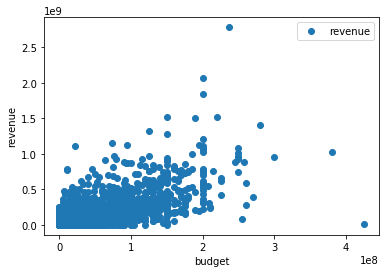

In [124]:
% matplotlib inline
#Plot budget budget VS revenue
df2.plot(x='budget', y='revenue', style='o')
plt.xlabel('budget')
plt.ylabel('revenue')

There is no strong Corolation bewteen budget and revenue

Text(0,0.5,'revenue')

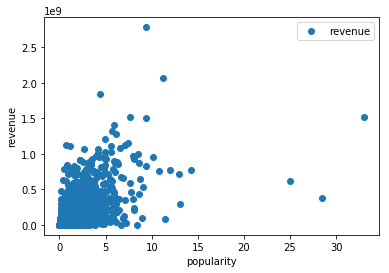

In [125]:
df2.plot(x='popularity', y='revenue', style='o')
plt.xlabel('popularity')
plt.ylabel('revenue')

In [126]:
# # There is no strong corolation between popularity and revenue ,popularity doesnot affect the revenue that much

Text(0,0.5,'revenue')

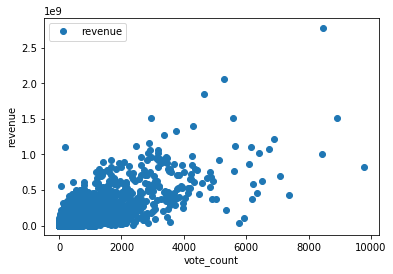

In [127]:
df2.plot(x='vote_count', y='revenue', style='o')
plt.xlabel('vote_count')
plt.ylabel('revenue')

 Vote count does impact the revenue but not that much, no strong corelation

Text(0,0.5,'revenue')

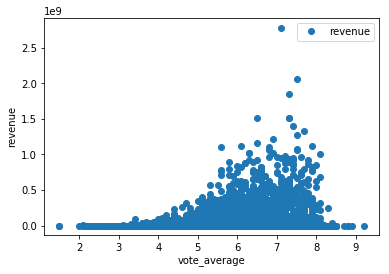

In [128]:
df2.plot(x='vote_average', y='revenue', style='o')
plt.xlabel('vote_average')
plt.ylabel('revenue')

 Vote average between 6 and 8 has the highest revenues

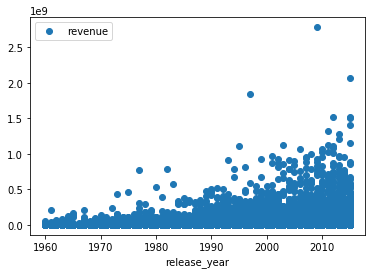

In [129]:
df2.plot(x='release_year', y='revenue', style='o')

looks like the movie Business is booming and increasing rapidly each year

Text(0,0.5,'revenue')

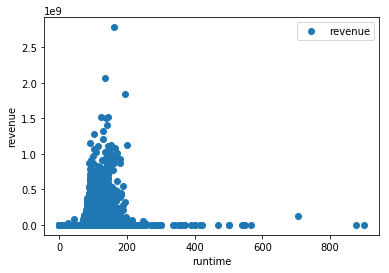

In [130]:
# Plot runtime VS revenue
df2.plot(x='runtime', y='revenue', style='o')
plt.xlabel('runtime')
plt.ylabel('revenue')

In [131]:
# from the above plot you can see that run time range from 100 to 200 min has the largest revenue
#lets dig in more and find the diff between these 2 ranges
a= df2.query('runtime <= 200 and runtime >=100 ').revenue.mean()
b=df2.query('runtime < 100 or runtime >200 ').revenue.mean()
# the Diff in mean revenue is 
print(a-b)

42802467.9434


as we can see in the above plot and calculations best range of runtime for movies are 100 min to 200 min  by that much 42802467 compared to the rest of the runtime range less than 100 and bigger than 200 minutes


###  Sub Question 1 -what is the best season for movies to be released (summer or winter) ?

In [132]:
# lets check the number of movies released per month
df2.season.value_counts()

9     1326
10    1144
12     977
8      910
1      907
6      826
3      820
5      808
11     807
4      797
7      794
2      685
Name: season, dtype: int64

In [133]:
# Number of movies released in the summer
n_summer = df2.query( 'season <= 10 and season >=4 ').season.value_counts().sum()
print(n_summer)

6605


In [134]:
# Number of movies released in the winter
n_winter=df2.query( 'season > 10 or  season < 4 ').season.value_counts().sum()
print(n_winter)

4196


In [135]:
#getting the diff in percentage between number of movies in the summer and winter
diff=((n_summer-n_winter)/(n_summer+n_winter))*100
print(diff ,'%')

22.3034904176 %


In [136]:
# Now lets calculate the revenue mean per summer and winter
summer=df2.query( 'season <= 10 and season >=4 ').revenue.mean()
winter=df2.query( 'season > 10 or  season < 4 ').revenue.mean()
print(winter-summer , '$')

64822.2073479 $


Although more movies are made in the summer by 22% , the mean revenue of the winter is higher than summer by 64822.2073479 dollars not alot compared to the revenues numbers


###  Sub Question 2 - which genere has the highest revenes ?

In [137]:
# Getting all the Genres in an array
m_type=['Comedy','Action','Family','Foreign','Fantasy','Mystery','Romance','Adventure','Crime','War','Horror','History','Thriller','Documentary','Drama','Animation','Music','TV Movie','Science Fiction']
# sorting them in accending order for easy navigation
m_type.sort()


In [138]:
# checking the sorting 
m_type

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War']

In [139]:
# getting the revenue mean per each type of genre and adding it to a new array with the same order as the 'm_type'
Rpmt=[] # revenue per movie type
for i in m_type:
    Rpmt.append(df2[df2['genres'].str.contains(i)].revenue.mean())
    

In [140]:
# reading the new array with mean revenues
Rpmt

[72948132.868432119,
 113523733.71964529,
 76017322.968208089,
 37632479.159175038,
 42369375.825701624,
 2085217.3614931237,
 29260884.175604627,
 72906982.923957482,
 96736085.40241228,
 1485656.4810810811,
 32204635.343373492,
 16833091.514669925,
 28998213.0,
 40267279.352286771,
 35769119.803278692,
 70427869.954248369,
 259259.25925925927,
 41757479.104991391,
 47605183.299999997]

Text(0,0.5,'Mean revenue')

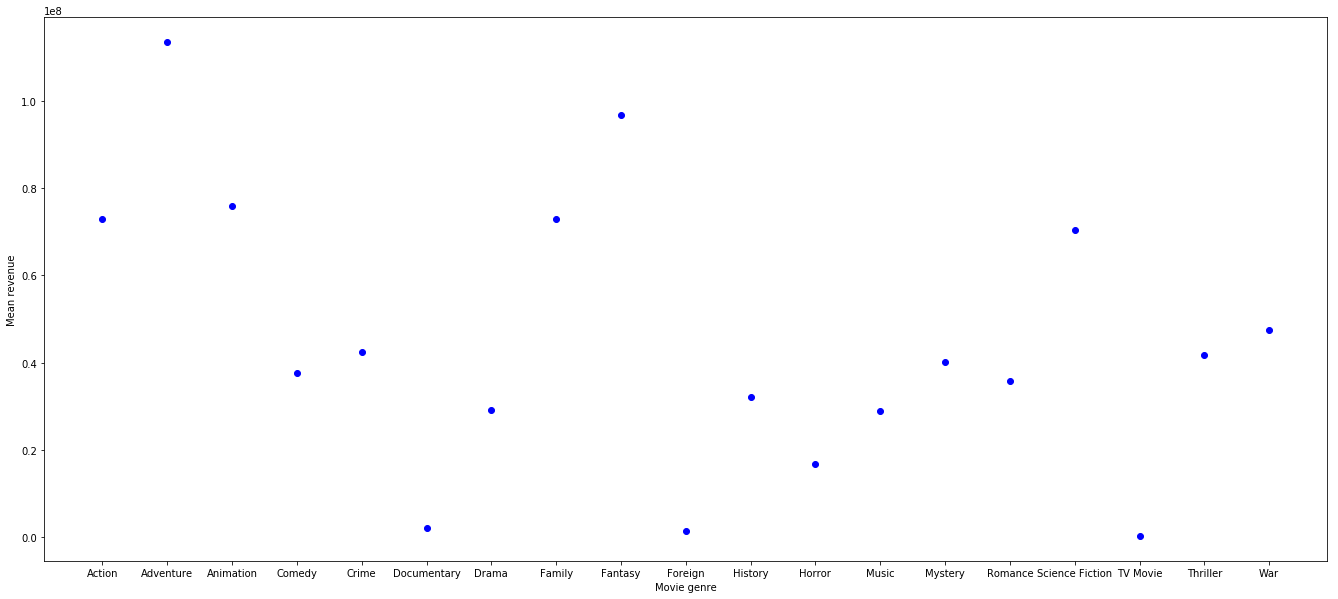

In [141]:
#Ploting the movie genre aganist the mean revenue to find out the winner with the highest mean revenues
figure(figsize=(23,10))
plt.plot(m_type, Rpmt,'bo')
plt.xlabel('Movie genre')
plt.ylabel('Mean revenue')

Top grossing genre are First  Adventure then Fantasy then Animation

In [142]:
Bpmt=[] # revenue per movie type
for i in m_type:
    Bpmt.append(df2[df2['genres'].str.contains(i)].budget.mean())

Text(0,0.5,'Budget')

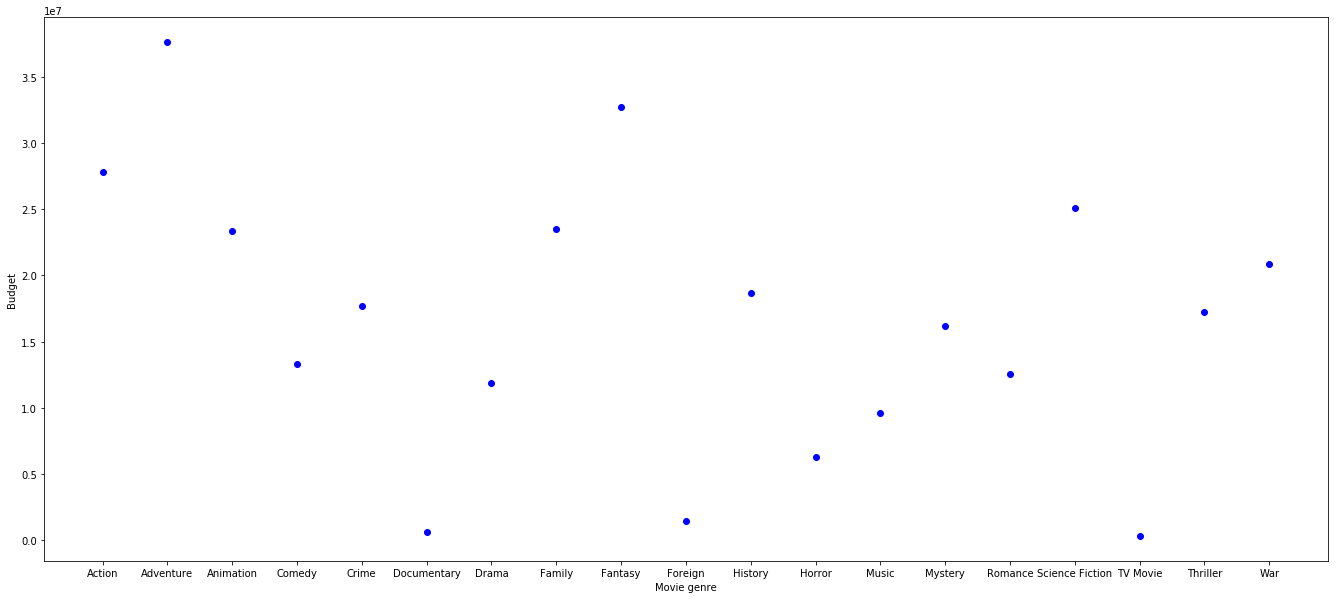

In [143]:
figure(figsize=(23,10))
plt.plot(m_type, Bpmt,'bo')
plt.xlabel('Movie genre')
plt.ylabel('Budget')

Adventure and Fantasy are costing the highest budgets, I thought action costs the most guess i was wrong

### Question 4 - Does more voting occur each year?

Text(0,0.5,'Vote_count')

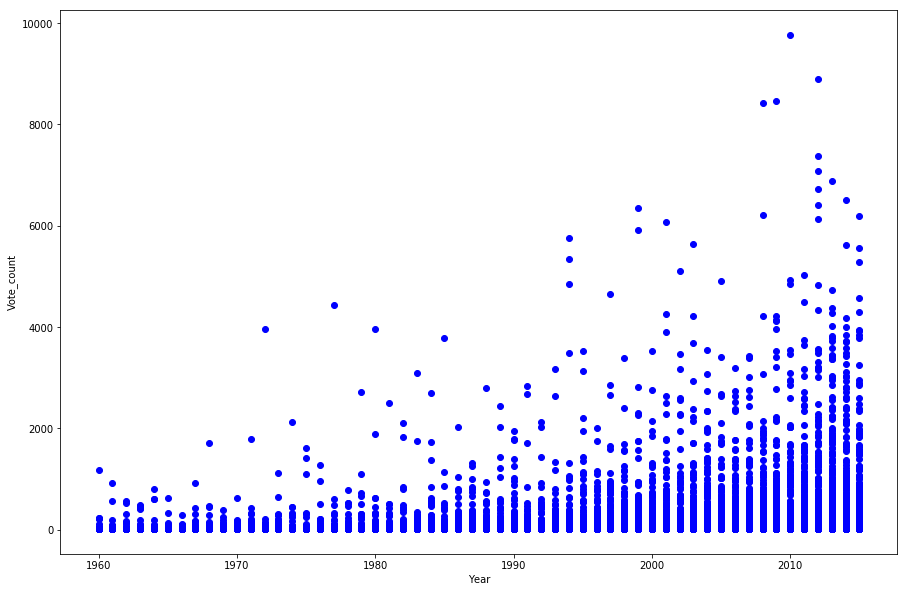

In [144]:
# Plotting the year aganist Vote_count
figure(figsize=(15,10))
plt.plot(df2.release_year,df2.vote_count, 'bo')
plt.xlabel('Year')
plt.ylabel('Vote_count')

It appears that vote counts are increasing every year , this may have something to do with the technogy and internet but in the future we can expect the vote counts to increase alot. We might start thinking how to make use of such data

### Question 5 - Is movie budget affected by runtime ?

Text(0,0.5,'budget')

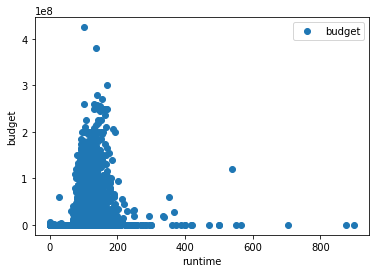

In [145]:
# lets plot the runtime with the budget 
df2.plot(x='runtime', y='budget', style='o')
plt.xlabel('runtime')
plt.ylabel('budget')


One would think that as runtime increase the Budget will increas as well but that is nit the case at all

<a id='conclusions'></a>
## Conclusions

>The revenues is dependent upon many features, 
- Highest revenues are accompanied by voting average from 6 to 8 , so the relation is not purely direct proportional
- Best duration time for a movie is between 100 min and 200 min , also the more the duration does not mean more budget is spent
- Movie revenues are increasing every year, but the interesting part is  Although more movies are made in the summer by 22% , the mean revenue of the winter is higher than summer by 64822 dollars not alot compared to the revenues numbers. This means people watch more movies in winter.
- Top grossing genre are by descending order Adventure then Fantasy then Animation , Also Adventure and Fantasy are costing the highest budgets, I thought action costs the most guess i was wrong
- It appears that vote counts are increasing every year, this may have something to do with the technology and internet but in the future we can expect the vote counts to increase a lot. We might start thinking how to make use of such massive data
- Popularity does not affect the Revenues




In [146]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0